# Regresja liniowa

W modelu liniowym zależność między $Y$ a $X_1, ..., X_p$ modelujemy jako:

$$Y=\beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$

Wartości współczynników $\beta_0, ..., \beta_p$ szacowane są metodą "najmniejszych kwadratów", w której zminimalizowa jest wartość $RSS$ (*Residual Sum of Squares*):

$$RSS=\sum_{i = 1}^n (y_i - \hat{y_i})^2$$



## Model liniowy w `statsmodels`

Wykorzystamy zbiór [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).
W pierwszym przykładzie tworzymy model w postaci: 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} $$

In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("mtcars.csv")

y = df.mpg
X = sm.add_constant(df.hp)

print(X.head())
print()
print(y.head())

   const   hp
0    1.0  110
1    1.0  110
2    1.0   93
3    1.0  110
4    1.0  175

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [2]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

Procedura `fit` zwraca obiekt typu [`RegressionResults`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

W podsumowaniu (`summary()`) podane są m.in. wartość $R^2$ oraz $p$-wartości szacowanych współczynników.

In [3]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.79e-07
Time:                        20:44:37   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Współczynniki $\hat{\beta_0}$ i $\hat{\beta_1}$ zapisane są w `lm_fit.params`.

In [4]:
lm_fit.params

const    30.098861
hp       -0.068228
dtype: float64

Reszty (*residuals*) zapisane są w `lm_fit.resid`.

In [5]:
lm_fit.resid.head()

0   -1.593750
1   -1.593750
2   -0.953631
3   -1.193750
4    0.541088
dtype: float64

W ocenie modelu przydatna jest także wizualizacja.

Text(0, 0.5, 'Residual')

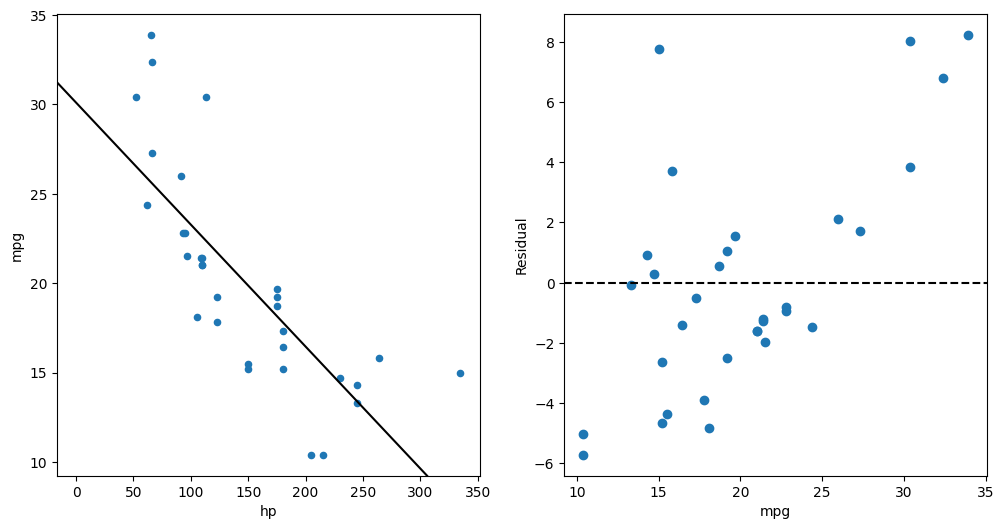

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.mpg, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('Residual')

Metoda `predict()` pozwala na predykcję wartości `mpg` dla nowych danych.

In [7]:
X_new = sm.add_constant([100, 150])
y_pred = lm_fit.predict(X_new)
y_pred

array([23.27603273, 19.86461883])

Tworząc model zawierający wiele zmiennych możemy skorzystać z `statsmodels.formula.api`, które pozwala podać 'wzór' modelu zamiast manualnie przygotowywać dane wejściowe. 
$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{cyl}$$

In [8]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula="mpg ~ hp + cyl", data=df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.16e-09
Time:                        20:48:10   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9083      2.191     16.847      0.000      32.428      41.389
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Względem poprzedniego modelu wartość $R^2$ wzrosła z $0.602$ do $0.741$. Zwróćmy uwagę, że $p$-wartość współczynnika `hp` wynosi 0.213, co sugeruje, że nie ma zależności między `mpg` a `hp`, mimo że wykryliśmy taką zależność w modelu jednoczynnikowym. Jest to spowodowane liniową współzależnością między zmiennymi.

<Axes: >

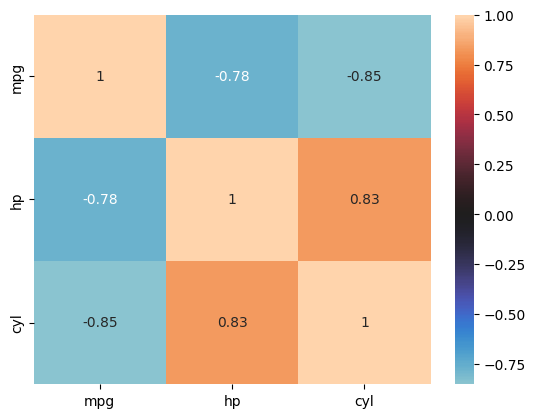

In [9]:
import seaborn as sns
sns.heatmap(df[["mpg", "hp", "cyl"]].corr(), annot=True, center=0.0)

Rozważmy alternatywny model:

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt}$$

In [10]:
lm2 = smf.ols(formula="mpg ~ hp + wt", data=df)
lm_fit2 = lm2.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           9.11e-12
Time:                        20:49:11   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model wielomianowy

W rozważanym wcześniej modelu `mpg ~ hp` faktyczny rozkład danych widoczny na wykresie jest wyraźnie nieliniowy. Sprawdźmy, czy poniższy model wielomianowy lepiej odwzoruje zależność między `mpg` a `hp`. 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{hp}^2$$

In [11]:
lm3 = smf.ols(formula="mpg ~ hp + I(hp**2)", data=df)

lm_fit3 = lm3.fit()

lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     44.95
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.30e-09
Time:                        20:50:24   Log-Likelihood:                -79.801
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      29   BIC:                             170.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4091      2.741     14.744      0.000      34.804      46.015
hp            -0.2133      0.035     -6.115      0.000      -0.285      -0.142
I(hp ** 2)     0.0004   9.84e-05      4.275      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.211   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.579
Skew:                           0.844   Prob(JB):                        0.101
Kurtosis:                       3.767   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residual')

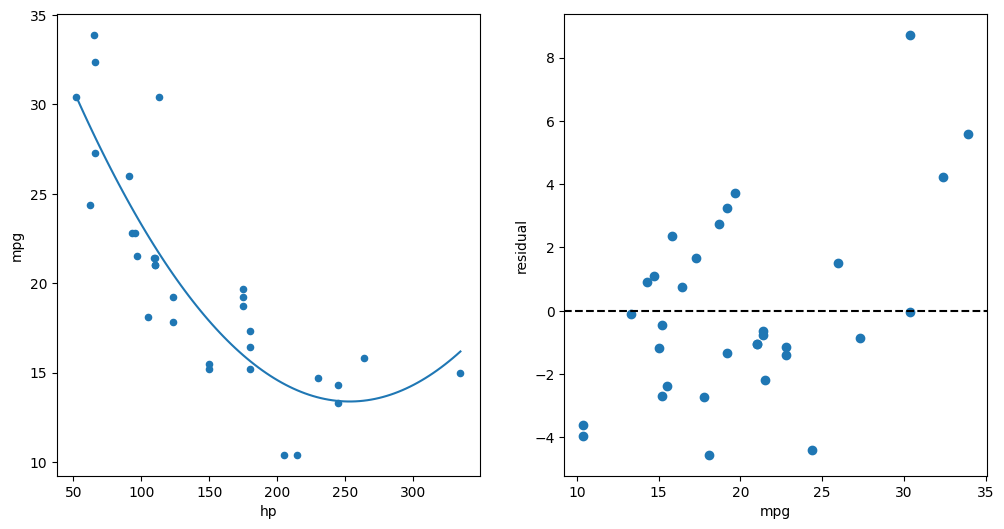

In [12]:
import numpy as np
import patsy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)

x_plot = np.linspace(df.hp.min(), df.hp.max(), 100)
X_plot = patsy.dmatrix(" ~ 1 + hp + I(hp**2)", data={"hp": x_plot}, return_type='dataframe')
y_plot = lm_fit3.predict(X_plot)

ax1.plot(x_plot, y_plot)

ax2.scatter(df.mpg, lm_fit3.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('residual')

## Modelowanie interakcji między zmiennymi

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt} + \hat{\beta_3} \mathtt{hp} \cdot \mathtt{wt}$$

In [13]:
lm4 = smf.ols(formula="mpg ~ hp + wt + hp:wt", data=df) # Możemy też wykorzystać formula="mpg ~ hp*wt"

lm_fit4 = lm4.fit()

lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.98e-13
Time:                        20:52:06   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Zadania
1. Wczytaj zbiór danych w pliku `boston.csv` ([opis](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston)), a następnie modeluj zależność `medv` od pozostałych zmiennych.
    - Testuj kilka modeli (z jedną lub wieloma zmiennymi) i wybierz najlepszy. Dokonując manualnej selekcji modelu warto wstępnie zwizualizować macierz korelacji między zmiennymi. Można też skorzystać z metod forward/backward selection.
    - Porównując modele, wykorzystaj `summary()`, aby sprawdzić $R^2$ modelu i $p$-wartośći współczynników.
    - Wizualizuj modele (np. *residual plot*).
    - Bonus: modeluj także zależności nieliniowe (np. wielomianowe) i/lub interakcje między zmiennymi.
2. Wczytaj zbiór danych w pliku `housing.csv`, 
    - Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
    - Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
    - Modeluj zależność `median_house_value` od `ocean_proximity`.

In [1]:
import pandas as pd
import numpy as np

boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

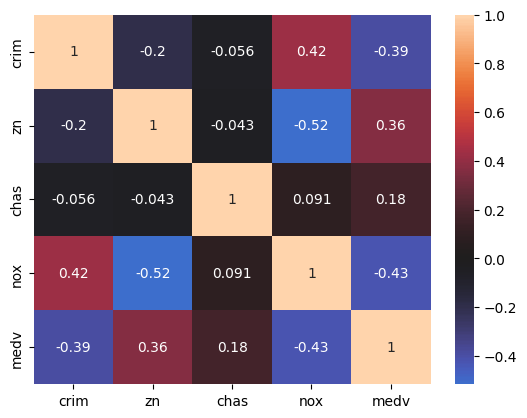

In [2]:
import seaborn as sns
sns.heatmap(boston[["crim", "zn", "chas", "nox", "medv"]].corr(), annot=True, center=0.0)

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
y = boston.medv
X = boston.drop('medv', axis = 1)

X,y

(        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   
 
      ptratio       b  lstat  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

In [5]:
import statsmodels.api as sm

def forward_selection(data, target):
  init_features = data.columns
  best_features = []
  prev_fval = 0
  while len(init_features):
    rest_features = [f for f in init_features if f not in best_features]
    fval = pd.Series(index=rest_features, dtype=float) # one-d array with index as columns (features)
    for col in rest_features:
      X_new = sm.add_constant(data[best_features+[col]])
      model = sm.OLS(target, X_new).fit()
      fval[col] = model.fvalue
    max_fval = fval.max()
    if max_fval > prev_fval:
      prev_fval = max_fval
      best_features.append(fval.idxmax())
    else:
      break
  return best_features

features1 = forward_selection(X, y)
features1


['lstat']

In [6]:
X1 = sm.add_constant(X[features1])
model = sm.OLS(y, X1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        10:32:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='lstat', ylabel='medv'>

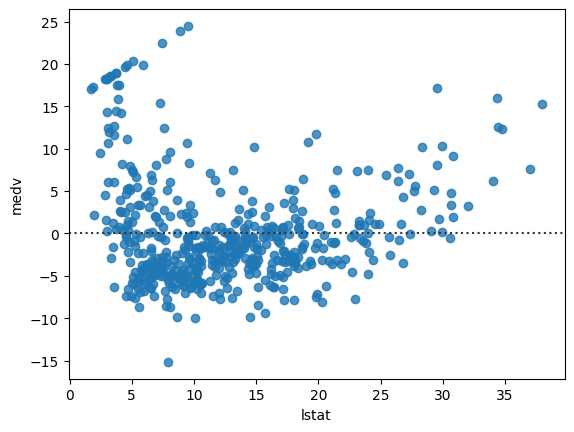

In [7]:
sns.residplot(data=boston, x="lstat", y="medv")

In [8]:
import statsmodels.formula.api as smf

model_sq = smf.ols(formula = 'medv ~ np.power(lstat, 2) + lstat', data = boston).fit()
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.56e-112
Time:                        10:32:26   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import statsmodels.formula.api as smf

model_sq = smf.ols(formula = 'medv ~ lstat*rm', data = boston).fit()
model_sq.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.75e-146
Time:                        10:32:26   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.000     -35.692     -22.558
lstat          2.1940      0.206     10.666      0.000       1.790       2.598
rm             9.7013      0.500     19.393      0.000       8.718      10.684
lstat:rm      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def forward_selection2(data, target, sl = 0.05):
  init_features = data.columns
  best_features = []
  while len(init_features):
    rest_features = [f for f in init_features if f not in best_features]
    pvals = pd.Series(index=rest_features, dtype=float) # one-d array with index as columns (features)
    for col in rest_features:
      X_new = sm.add_constant(data[best_features+[col]])
      model = sm.OLS(target, X_new).fit()
      pvals[col] = model.pvalues[col]
    min_pval = pvals.min()
    if min_pval < sl:
      best_features.append(pvals.idxmin())
    else:
      break
  return best_features

features2 = forward_selection2(X, y)
features2

['lstat',
 'rm',
 'ptratio',
 'dis',
 'nox',
 'chas',
 'b',
 'zn',
 'crim',
 'rad',
 'tax']

In [11]:
X2 = sm.add_constant(X[features2])
model = sm.OLS(y, X2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          5.54e-137
Time:                        10:32:26   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
rm             3.8016      0.406      9.356      0.000       3.003       4.600
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
chas           2.7187      0.854      3.183      0.002       1.040       4.397
b              0.0093      0.003      3.475      0.001       0.004       0.015
zn             0.0458      0.014      3.390      0.001       0.019       0.072
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
[x for x in X if x not in features2]

['indus', 'age']

<Axes: >

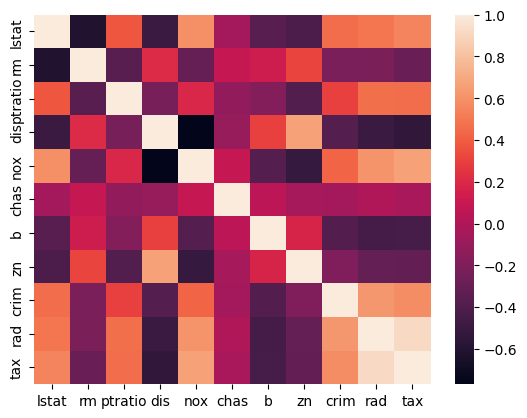

In [13]:
sns.heatmap(X[features2].corr())

In [14]:
X.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
X[['tax', 'rad']].corr()

,tax,rad
tax,1.000000,0.910228
rad,0.910228,1.000000


2. Wczytaj zbiór danych w pliku `housing.csv`, 
    - Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
    - Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
    - Modeluj zależność `median_house_value` od `ocean_proximity`.

In [17]:
housing = pd.read_csv('housing.csv')
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
h2 = housing.dropna()
h2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
dummies = pd.get_dummies(h2['ocean_proximity'])
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [21]:
y = h2['median_house_value']
Xh = sm.add_constant(dummies)
model = sm.OLS(y, Xh).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1275.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:37:58   Log-Likelihood:            -2.6439e+05
No. Observations:               20433   AIC:                         5.288e+05
Df Residuals:                   20427   BIC:                         5.288e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.549e+16   5.68e+16     -0.802      0.423   -1.57e+17    6.58e+16
<1H OCEAN   4.549e+16   5.68e+16      0.802      0.423   -6.58e+16    1.57e+17
INLAND      4.549e+16   5.68e+16      0.802      0.423   -6.58e+16    1.57e+17
ISLAND      4.549e+16   5.68e+16      0.802      0.423   -6.58e+16    1.57e+17
NEAR BAY    4.549e+16   5.68e+16      0.802      0.423   -6.58e+16    1.57e+17
NEAR OCEAN  4.549e+16   5.68e+16      0.802      0.423   -6.58e+16    1.57e+17
==============================================================================
Omnibus:                     2659.157   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3845.995
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                       3.755   Cond. No.                     2.28e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
d2 = dummies * 1e+16
d2

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.000000e+00,0.0,1.000000e+16,0.0
1,0.0,0.000000e+00,0.0,1.000000e+16,0.0
2,0.0,0.000000e+00,0.0,1.000000e+16,0.0
3,0.0,0.000000e+00,0.0,1.000000e+16,0.0
4,0.0,0.000000e+00,0.0,1.000000e+16,0.0
...,...,...,...,...,...
20635,0.0,1.000000e+16,0.0,0.000000e+00,0.0
20636,0.0,1.000000e+16,0.0,0.000000e+00,0.0
20637,0.0,1.000000e+16,0.0,0.000000e+00,0.0
20638,0.0,1.000000e+16,0.0,0.000000e+00,0.0


In [23]:
Xh2 = sm.add_constant(d2)
model = sm.OLS(y, Xh2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1595.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:40:52   Log-Likelihood:            -2.6439e+05
No. Observations:               20433   AIC:                         5.288e+05
Df Residuals:                   20428   BIC:                         5.288e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.254e-26   4.52e-28     27.747      0.000    1.17e-26    1.34e-26
<1H OCEAN   2.403e-11   1.06e-13    226.602      0.000    2.38e-11    2.42e-11
INLAND      1.249e-11   1.25e-13     99.885      0.000    1.22e-11    1.27e-11
ISLAND      3.804e-11   4.51e-12      8.441      0.000    2.92e-11    4.69e-11
NEAR BAY    2.593e-11   2.12e-13    122.577      0.000    2.55e-11    2.63e-11
NEAR OCEAN   2.49e-11   1.97e-13    126.682      0.000    2.45e-11    2.53e-11
==============================================================================
Omnibus:                     2642.118   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3813.790
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.754   Cond. No.                     2.77e+29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""